# Multiple linear regression
By Evgenia "Jenny" Nitishinskaya and Delaney Granizo-Mackenzie

Notebook released under the Creative Commons Attribution 4.0 License.

---

Multiple linear regression generalizes linear regression, allowing the dependent variable to be a linear function of multiple independent variables. As before, we assume that the variable $Y$ is a linear function of $X_1,\ldots, X_k$:
$$ Y_i = \beta_0 + \beta_1 X_{1i} + \ldots + \beta_k X_{ki} + \epsilon_i $$
for observations $i = 1,2,\ldots, n$. We solve for the coefficients by using the method of ordinary least-squares, trying to minimize the error $\sum_{i=1}^n \epsilon_i^2$ to find the (hyper)plane of best fit. Once we have the coefficients, we can predict values of $Y$ outside of our observations.

Each coefficient $\beta_j$ tells us how much $Y_i$ will change if we change $X_j$ by one while holding all of the other dependent variables constant. This lets us separate out the contributions of different effects.

We start by artificially constructing a $Y$ for which we know the result.

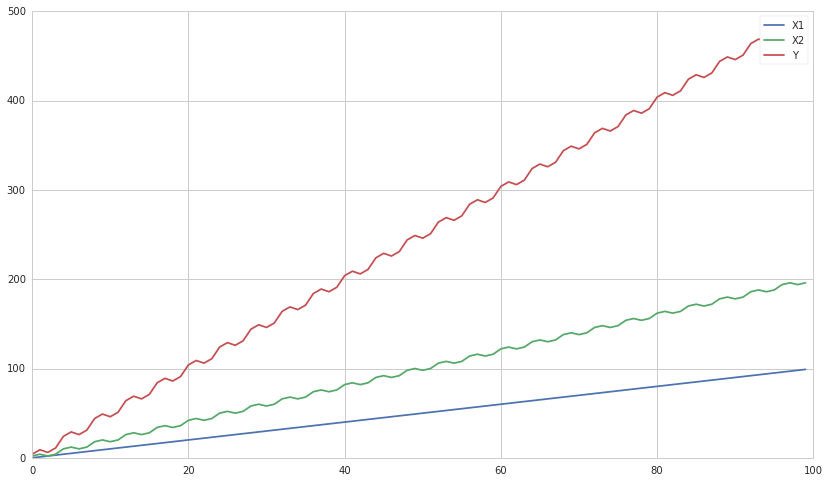

In [81]:
# Import the libraries we'll be using
import numpy as np
import statsmodels.api as sm
# If the observations are in a dataframe, you can use statsmodels.formulas.api to do the regression instead
from statsmodels import regression
import matplotlib.pyplot as plt

# Construct and plot series
X1 = np.arange(100)
X2 = np.array([i^2 for i in range(100)]) + X
Y = X1 + 2*X2
plt.plot(X1, label='X1')
plt.plot(X2, label='X2')
plt.plot(Y, label='Y')
plt.legend();

We can use the same function from `statsmodels` as we did for a single linear regression.

In [101]:
# Use column_stack to combine independent variables, then add a column of ones so we can fit an intercept
results = regression.linear_model.OLS(Y, sm.add_constant(np.column_stack((X1,X2)))).fit()

print 'Beta_0:', results.params[0], 'Beta_1:', results.params[1], ' Beta_2:', results.params[2]

Beta_0: 2.09610107049e-13 Beta_1: 1.0  Beta_2: 2.0


The same care must be taken with these results as with partial derivatives. The formula for $Y$ is ostensibly $3X_1$ plus a parabola. However, the coefficient of $X_1$ is 1. That is because $Y$ changes by 1 if we change $X_1$ by 1 <i>while holding $X_2$ constant</i>. Multiple linear regression separates out contributions from different variables, so that the coefficient of $X_1$ is different from what it would be if we did a single linear regression on $X_1$ and $Z$.

Similarly, running a linear correlation on two securities might give a high $\beta$. However, if we bring in a third security (like SPY, which tracks the S&P 500) as an independent variable, we may find that the correlation between the first two securities is almost entirely due to them both being correlated with the S&P 500. This is useful because the S&P 500 may then be a more reliable predictor of both securities than they were of each other. We can also better see whether the correlation between the two securitites is significant.

SLR beta of asset2: 0.903453633397
MLR beta of asset2: -0.232309102745  MLR beta of S&P 500 0.735923920897


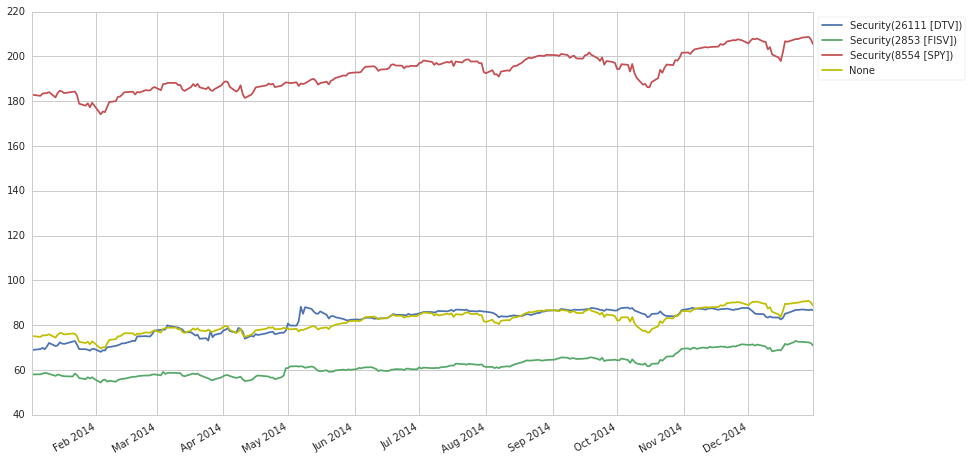

In [96]:
# Load pricing data for two arbitrarily-chosen assets and SPY
start = '2014-01-01'
end = '2015-01-01'
asset1 = get_pricing('DTV', fields='price', start_date=start, end_date=end)
asset2 = get_pricing('FISV', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

# First, run a linear regression on the two assets
slr = regression.linear_model.OLS(asset1, sm.add_constant(asset2)).fit()
print 'SLR beta of asset2:', slr.params[1]

# Run multiple linear regression using asset2 and SPY as independent variables
mlr = regression.linear_model.OLS(asset1, sm.add_constant(np.column_stack((asset2, benchmark)))).fit()
prediction = mlr.params[0] + mlr.params[1]*asset2 + mlr.params[2]*benchmark
print 'MLR beta of asset2:', mlr.params[1], ' MLR beta of S&P 500', mlr.params[2]

# Plot the three variables along with the prediction given by the MLR
asset1.plot()
asset2.plot()
benchmark.plot()
prediction.plot(color='y')
plt.legend(bbox_to_anchor=(1,1), loc=2);

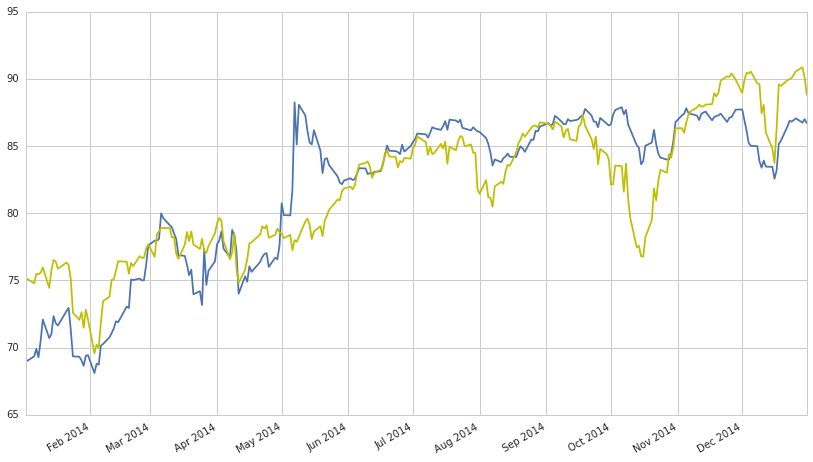

In [79]:
# Plot only the dependent variable and the prediction to get a closer look
asset1.plot()
prediction.plot(color='y');

# Evaluating

We can get some statistics about the fit from the result returned by the regression:

In [102]:
mlr.summary()

[2015-06-22 16:08:32.094624] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-22 16:08:32.095398] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-22 16:08:32.096002] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-22 16:08:32.096559] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-22 16:08:32.097429] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-22 16:08:32.097981] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-22 16:08:32.098592] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-22 16:08:32.099211] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-22 16:08:32.099721] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-22 16:08:32.100213] DEBUG: root: Exit SimpleTable.data2rows.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Security(26111 [DTV])   R-squared:                       0.715
Model:                               OLS   Adj. R-squared:                  0.713
Method:                    Least Squares   F-statistic:                     313.1
Date:                   Mon, 22 Jun 2015   Prob (F-statistic):           1.08e-68
Time:                           16:08:32   Log-Likelihood:                -641.97
No. Observations:                    252   AIC:                             1290.
Df Residuals:                        249   BIC:                             1301.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -45.9532      6.601     -6.962      0.000       -58.954   -32.953
x1            -0.2323      0.105     -2.216      0.028        -0.439    -0.026
x2             0.7359      0.063     11.767      0.000         0.613     0.859
==============================================================================
Omnibus:                       16.118   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.367
Skew:                           0.596   Prob(JB):                     0.000169
Kurtosis:                       3.483   Cond. No.                     6.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The validity of these statistics depends on whether or not the assumptions of the linear regression model are satisfied. These are:
* The independent variable is not random.
* The variance of the error term is constant across observations. This is important for evaluating the goodness of the fit.
* The errors are not autocorrelated. The Durbin-Watson statistic reported by the regression detects this; if it is close to 2, there is no autocorrelation.
* The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.

Multiple linear regression also requires an additional assumption:
* There is no exact linear relationship between the independent variables. Otherwise, it is impossible to solve for the coefficients $\beta$ uniquely, since the same linear equation can be expressed in multiple ways.

If we confirm that the necessary assumptions of the regression model are satisfied, we can safely use the statistics reported to analyze the fit. For example, the $R^2$ value tells us the fraction of the total variation of $Y$ that is explained by the model. When doing multiple linear regression, however, we may prefer to use adjusted $R^2$, which corrects for the small increases in $R^2$ that occur when we add more regression variables to the model, even if they are not significantly correlated with the dependent variable. Adjusted $R^2$ is defined as
$$ 1 - \frac{n-1}{n-k-1}(1 - R^2) $$
Other useful statistics include the F-statistic and the standard error of estimate.